# "Mari Berkontribusi untuk Masyarakat"
> "Diagram pie lain yang harus diperbaiki"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Ali Akbar
- categories: [statis]

![Penelitian dan Kemitraan](../images/statis_posts/itb/pie-chart-itb.png "Sumber: https://infografis.itb.ac.id/data-info-itb-2015-penelitian-dan-kemitraan/")

Ternyata kampus gajah pun tidak terlepas dari kesalahan yang boleh dibilang elementer dalam visualisasi data: *pie chart*. Kalau Anda mendalami ilmu visualisasi data, luas daerah atau sudut yang diandalkan untuk membandingkan antarkelompok dalam *pie chart* tidak lebih efektif dibandingkan diagram batang yang mengandalkan panjang. Pie chart punya banyak penentang {% fn 1 %}.

Ditambah lagi, ada banyak kelompok dalam data ini, jadi semakin sulit untuk membedakan antarkelompok. Pada akhirnya, pembuat grafik di atas harus menuliskan angka persentase dan nama kelompok. Lantas kenapa tidak dalam tabel saja kalau begitu?

Berdasarkan referensi [ini](https://depictdatastudio.com/when-pie-charts-are-okay-seriously-guidelines-for-using-pie-and-donut-charts/), beberapa hal yang perlu dipertimbangkan sebelum menggunakan *pie chart* adalah:
1. **Format yang baik**, tidak 3D, tidak ada pecahan yang lepas, tidak pakai legenda tambahan.
2. **Variabel nominal**, bukan numerik.
3. **Jumlahnya 100%**, terkadang ada yang ajaib seperti [ini](https://twitter.com/YouGov/status/838720989991223297).
4. **Nilainya positif**, jangan ada negatifnya.
5. **Satu waktu**, bukan time series.
6. **Hanya dua atau tiga potong**, empat terlalu banyak.
7. **Ditampilkan secara individual**, jangan banyak *pie chart* - pusing.

Bagaimana dengan grafik di atas? Yang oke: 1, 2, 4, dan 5. Hanya sedikit lebih dari setengah, yang tetap saja tidak baik. *Semua atau tidak sama sekali.*

> *Eh, kok 3 tidak masuk?*

Usut punya usut, ternyata *pie chart* yang atas jumlahnya hanya 98% sedangkan yang bawah hanya 99%.

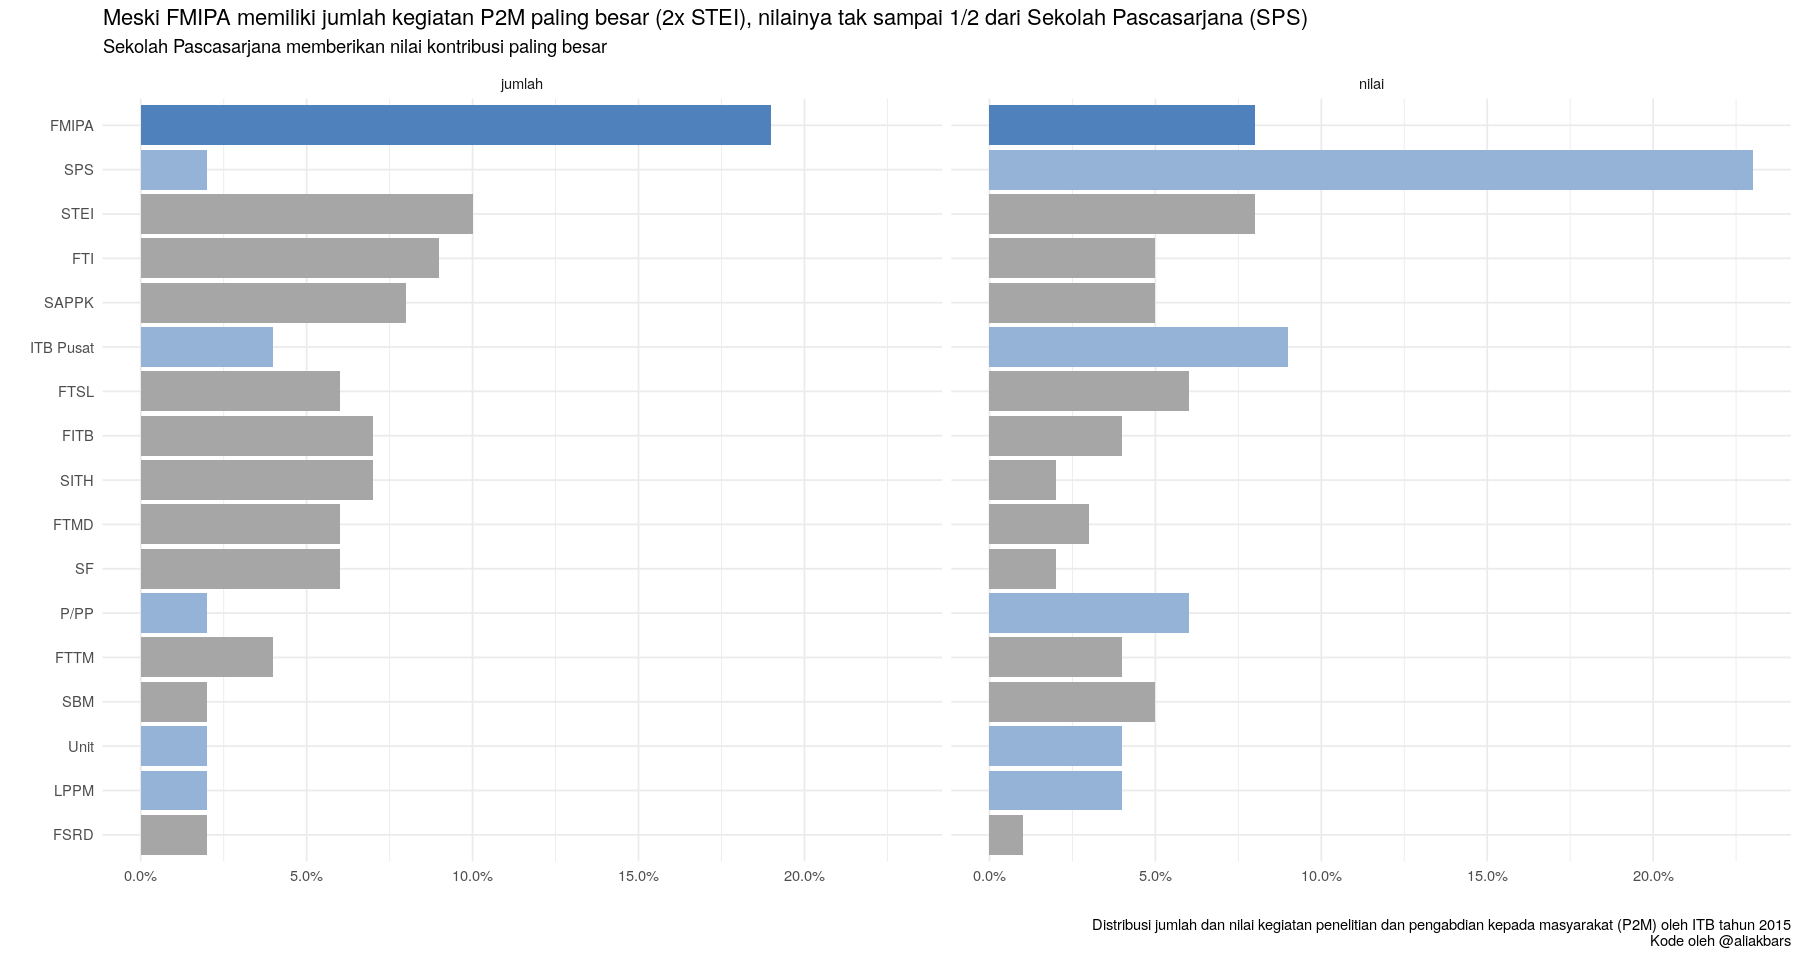

In [12]:
#collapse-hide

suppressPackageStartupMessages(library(tidyverse))

df <- tribble(
    ~kelompok, ~jumlah, ~nilai,
    'Unit', .02, .04,
    'FITB', .07, .04,
    'FMIPA', .19, .08,
    'FSRD', .02, .01,
    'FTI', .09, .05,
    'FTMD', .06, .03,
    'FTSL', .06, .06,
    'FTTM', .04, .04,
    'ITB Pusat', .04, .09,
    'LPPM', .02, .04,
    'P/PP', .02, .06,
    'SAPPK', .08, .05,
    'SBM', .02, .05,
    'SF', .06, .02,
    'SITH', .07, .02,
    'SPS', .02, .23,
    'STEI', .1, .08
) %>% pivot_longer(-(kelompok))

options(repr.plot.width=15, repr.plot.height=8)

df %>%
    ggplot() +
    geom_col(mapping = aes(x = reorder(kelompok, value), y = value),
             fill = '#a6a6a6') +
    geom_col(data = filter(df, kelompok == 'FMIPA'),
             mapping = aes(x = kelompok, y = value),
             fill = '#4f81bd') +
    geom_col(data = filter(df, kelompok %in% c('SPS', 'ITB Pusat', 'P/PP', 'Unit', 'LPPM')),
             mapping = aes(x = kelompok, y = value),
            fill = '#95b3d7') +
    scale_y_continuous(labels = scales::percent) +
    labs(x = '', y = '',
         title = 'Meski FMIPA memiliki jumlah kegiatan P2M paling besar (2x STEI), nilainya tak sampai 1/2 dari Sekolah Pascasarjana (SPS)',
         subtitle = 'Sekolah Pascasarjana memberikan nilai kontribusi paling besar',
         caption = 'Distribusi jumlah dan nilai kegiatan penelitian dan pengabdian kepada masyarakat (P2M) oleh ITB tahun 2015\nKode oleh @aliakbars') +
    coord_flip() +
    facet_grid(. ~ name) +
    theme_minimal()

Usaha saya untuk memperbaiki grafik aslinya dapat dilihat pada gambar di atas. Warna biru muda digunakan untuk merujuk pada kelompok yang bukan berupa fakultas. Biru yang lebih gelap digunakan untuk menunjukkan perhatian utama:

> Meski FMIPA memiliki jumlah kegiatan P2M paling besar (2x STEI), nilainya tak sampai 1/2 dari Sekolah Pascasarjana (SPS)

Kalau kita bicara penelitian dan semua mahasiswa pascasarjana lintas jurusan dimasukkan ke SPS, maka wajar nilai penelitian lebih tinggi di SPS meski jumlahnya lebih sedikit. Seharusnya memang penelitian lebih banyak dihasilkan oleh mahasiswa doktoral. Meski demikian, dalam infografik aslinya kita sayangnya tidak punya pengetahuan tentang jumlah sebenarnya - hanya ada dalam persentase.

Pertanyaan lain yang mungkin muncul dari grafiknya adalah mengapa LPPM menjadi kelompok yang jumlah P2M-nya kedua terbawah? Padahal namanya sendiri justru mewakili kegiatan yang jadi topik utama. Untuk menjawab ini, kelihatannya memang harus punya lebih banyak tentang tupoksi dari LPPM sendiri.

{{ 'Beberapa di antaranya adalah [ini](http://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts), [ini](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00018S), dan [ini](https://qz.com/1259746/when-should-you-use-a-pie-chart-according-to-experts-almost-never/).' | fndetail: 1 }}